In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mzn_bench as mb

import os

In [18]:
root = os.path.dirname(os.path.abspath("__file__"))
statistics = pd.read_csv(os.path.join(root, 'statistics.csv'))
is_median = statistics['configuration'].str.contains('Median')
statistics = statistics.join(statistics[is_median]['configuration'].str.extract(r'(?P<case>[^_]+)_(?P<solver>[^_]+)_(?P<type>[^_]+)', expand=True))
is_mindis = statistics['data_file'].str.contains('mindis')
statistics.loc[is_mindis, ['solver', 'type']] = statistics.loc[is_mindis, 'configuration'].str.extract(r'(?P<solver>[^_]+)_(?P<type>[^_]+)', expand=True)
statistics.loc[is_mindis, 'case'] = statistics.loc[is_mindis, 'data_file'].str.extract(r'/(?P<case>\w+?)_')
is_maxeff = statistics['data_file'].str.contains('maxeff')
statistics.loc[is_maxeff, ['solver', 'type']] = statistics.loc[is_maxeff, 'configuration'].str.extract(r'(?P<solver>[^_]+)_(?P<type>[^_]+)', expand=True)
statistics.loc[is_maxeff, 'case'] = statistics.loc[is_maxeff, 'data_file'].str.extract(r'/(?P<case>\w+?)_')
statistics['case'] = statistics['case'].str.lower()
statistics['solver'] = statistics['solver'].str.lower()
statistics['type'] = statistics['type'].str.lower()
statistics['data_file'] = statistics['data_file'].str.replace('new_dzn/', '').str.replace('dzn/', '')
statistics

,configuration,problem,model,data_file,status,time,flatBoolVars,flatIntConstraints,initTime,eliminatedImplications,...,flatIntVars,failures,nSolutions,nodes,propagators,solveTime,flatTime,case,solver,type
0,Gecode_BB,.,jobshop_gini.mzn,maxeff_ta45_2a_alloc3.dzn,OPTIMAL_SOLUTION,9.074661,19908.0,23575.0,0.277554,1260.0,...,2466.0,4422.0,78.0,29278.0,32874.0,6.68196,1.66532,maxeff,gecode,bb
1,Median_Gecode_Decomp,.,jobshop_gini.mzn,ta52_3a_alloc2.dzn,OPTIMAL_SOLUTION,37.142543,39957.0,44565.0,0.586221,1600.0,...,3110.0,9489.0,134.0,63617.0,63689.0,32.03240,3.50134,median,gecode,decomp
2,Gecode_Decomp,.,jobshop_gini.mzn,mindis_ta74_7a_alloc1.dzn,SATISFIED,605.814826,206574.0,218829.0,NaN,4200.0,...,8254.0,NaN,37.0,NaN,NaN,NaN,15.97080,mindis,gecode,decomp
3,Gecode_BB,.,jobshop_gini.mzn,maxeff_ta51_4a_alloc1.dzn,OPTIMAL_SOLUTION,35.793432,39956.0,44565.0,0.573138,1600.0,...,3108.0,10767.0,159.0,70013.0,63689.0,31.01060,3.38357,maxeff,gecode,bb
4,Median_Gecode_Decomp,.,jobshop_gini.mzn,ta80_9a_alloc1.dzn,OPTIMAL_SOLUTION,296.955428,206571.0,218785.0,2.980570,4200.0,...,8222.0,17547.0,136.0,114237.0,319784.0,273.17300,15.91640,median,gecode,decomp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,Gecode_Decomp,.,jobshop_gini.mzn,maxeff_ta35_2a_alloc3.dzn,OPTIMAL_SOLUTION,7.100636,14962.0,17733.0,0.191769,960.0,...,1870.0,4124.0,112.0,28218.0,24707.0,5.23989,1.33164,maxeff,gecode,decomp
2724,Median_Gecode_Decomp,.,jobshop_gini.mzn,ta65_5a_alloc1.dzn,OPTIMAL_SOLUTION,36.492798,53218.0,59328.0,0.837014,2100.0,...,4114.0,6738.0,92.0,44779.0,84827.0,29.48540,4.82697,median,gecode,decomp
2725,Gecode_Decomp,.,jobshop_gini.mzn,maxeff_ta74_9a_alloc2.dzn,SATISFIED,605.454249,206560.0,218848.0,NaN,4200.0,...,8287.0,NaN,105.0,NaN,NaN,NaN,15.26410,maxeff,gecode,decomp
2726,Gecode_Decomp,.,jobshop_gini.mzn,maxeff_ta66_5a_alloc3.dzn,OPTIMAL_SOLUTION,59.691115,53217.0,59349.0,0.713605,2100.0,...,4131.0,16535.0,171.0,105023.0,84848.0,53.62860,4.21032,maxeff,gecode,decomp


In [19]:
is_blackbox = statistics['type'] == 'bb'
is_decomp = statistics['type'] == 'decomp'
is_mindis = statistics['case'] == 'mindis'
is_median = statistics['case'] == 'median'
is_maxeff = statistics['case'] == 'maxeff'

In [15]:
raw_counts = statistics.groupby(['case', 'type'])['status'].value_counts().unstack().fillna(0).astype(int)
norm_counts = statistics.groupby(['case', 'type'])['status'].value_counts(normalize=True).unstack().fillna(0).round(4) * 100

print("Raw Counts:")
print(raw_counts)
print("\nNormalized Counts:")
print(norm_counts)

Raw Counts:
status         OPTIMAL_SOLUTION  SATISFIED  UNKNOWN  UNSATISFIABLE
case   type                                                       
maxeff bb                   258        144       40              0
       decomp               262        175        5              0
median bb                     0        480        0              0
       decomp               474          6        0              0
mindis bb                    76        365        0              1
       decomp               131        310        0              1

Normalized Counts:
status         OPTIMAL_SOLUTION  SATISFIED  UNKNOWN  UNSATISFIABLE
case   type                                                       
maxeff bb                 58.37      32.58     9.05           0.00
       decomp             59.28      39.59     1.13           0.00
median bb                  0.00     100.00     0.00           0.00
       decomp             98.75       1.25     0.00           0.00
mindis bb                 17.1

In [20]:
def plot_blackbox_vs_decomp_scatter(bb_objective_scores: pd.DataFrame, decomp_objective_scores: pd.DataFrame, title: str):
    plt.figure(figsize=(10,6))
    x_min = min(bb_objective_scores.min(), decomp_objective_scores.min())
    x_max = max(bb_objective_scores.max(), decomp_objective_scores.max())
    x_vals = np.linspace(x_min, x_max, 100)
    plt.fill_between(x_vals, x_vals, [x_max]*len(x_vals), color='orange', alpha=0.2, label='BlackBox Dominant')
    plt.fill_between(x_vals, [x_min]*len(x_vals), x_vals, color='blue', alpha=0.2, label='Decomp Dominant')
    plt.plot(x_vals, x_vals, color='red', linestyle='--', label='Separation Line')
    plt.scatter(bb_objective_scores, decomp_objective_scores, color='green', marker='o', label='BlackBox vs Decomp')
    plt.ylabel('Blackbox Objective')
    plt.xlabel('Decomp Objective')
    plt.title(title)
    plt.legend()
    plt.show()

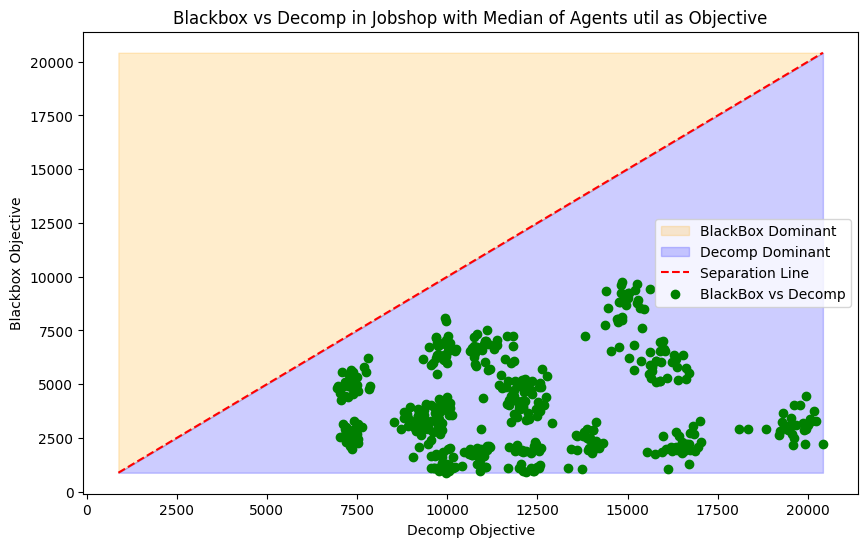

In [21]:
r = statistics[is_median][['data_file', 'objective', 'type']].copy()
r['objective'] = r['objective'].fillna(value=-1).astype(int)
r['objective'] = -r['objective']
blackbox_data = r[r['type'] == 'bb']
decomp_data = r[r['type'] == 'decomp']
mindis = pd.merge(left=blackbox_data, right=decomp_data, suffixes=('_bb', '_decomp'), on='data_file')
temp = mindis['objective_bb']
mindis['objective_bb'] = mindis['objective_decomp']
mindis['objective_decomp'] = temp
plot_blackbox_vs_decomp_scatter(mindis['objective_bb'], mindis['objective_decomp'], 'Blackbox vs Decomp in Jobshop with Median of Agents util as Objective')

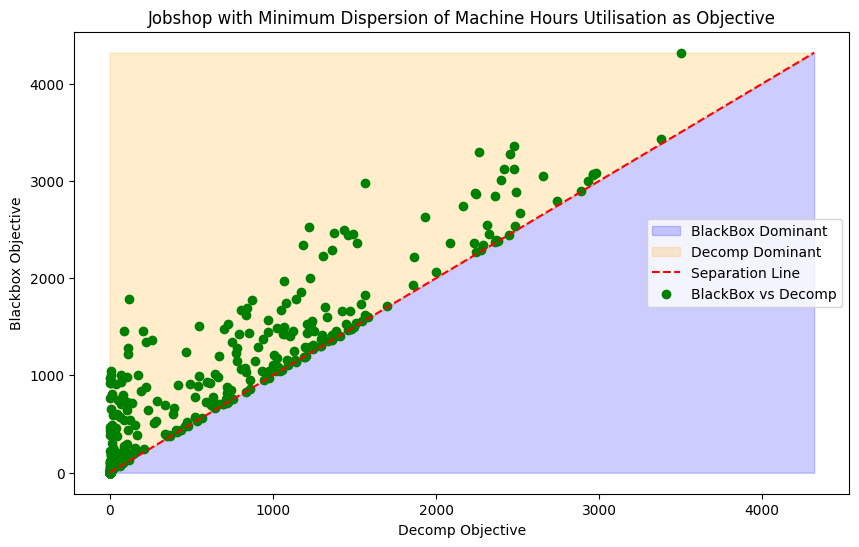

In [29]:
r = statistics[is_mindis][['data_file', 'objective', 'type']].copy()
r['objective'] = r['objective'].fillna(value=-1).astype(int)
blackbox_data = r[r['type'] == 'bb']
decomp_data = r[r['type'] == 'decomp']
mindis = pd.merge(left=blackbox_data, right=decomp_data, suffixes=('_bb', '_decomp'), on='data_file')
plt.figure(figsize=(10,6))
x_min = min(mindis['objective_bb'].min(), mindis['objective_decomp'].min())
x_max = max(mindis['objective_bb'].max(), mindis['objective_decomp'].max())
x_vals = np.linspace(x_min, x_max, 100)
plt.fill_between(x_vals, [x_min]*len(x_vals), x_vals, color='blue', alpha=0.2, label='BlackBox Dominant')
plt.fill_between(x_vals, x_vals, [x_max]*len(x_vals), color='orange', alpha=0.2, label='Decomp Dominant')
plt.plot(x_vals, x_vals, color='red', linestyle='--', label='Separation Line')
plt.scatter(mindis['objective_decomp'], mindis['objective_bb'], color='green', marker='o', label='BlackBox vs Decomp')
plt.ylabel('Blackbox Objective')
plt.xlabel('Decomp Objective')
plt.title('Jobshop with Minimum Dispersion of Machine Hours Utilisation as Objective')
plt.legend()
plt.show()

In [24]:
mindis[mindis['objective_bb'] < mindis['objective_decomp']]

,data_file,objective_bb,type_bb,objective_decomp,type_decomp


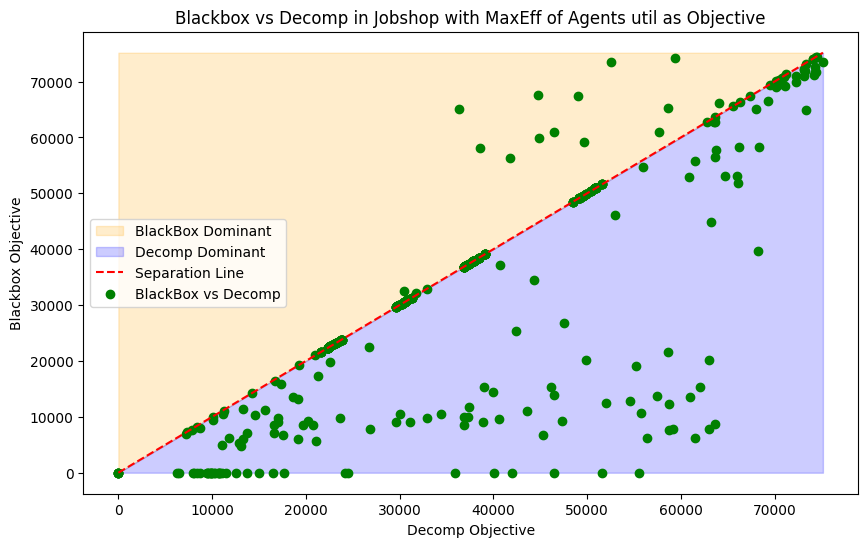

In [ ]:
r = statistics[is_maxeff][['data_file', 'objective', 'type']].copy()
r['objective'] = -r['objective'].fillna(value=1).astype(int)
blackbox_data = r[r['type'] == 'bb']
decomp_data = r[r['type'] == 'decomp']
maxeff = pd.merge(left=blackbox_data, right=decomp_data, suffixes=('_bb', '_decomp'), on='data_file')
# Swap the objective columns due to incorrect display of the reverse negative values
temp = maxeff['objective_bb'].copy()
maxeff['objective_bb'] = maxeff['objective_decomp']
maxeff['objective_decomp'] = temp
plot_blackbox_vs_decomp_scatter(maxeff['objective_bb'], maxeff['objective_decomp'], 'Blackbox vs Decomp in Jobshop with MaxEff of Agents util as Objective')

In [ ]:
root = os.path.dirname(os.path.abspath("__file__"))
objectives = pd.read_csv(os.path.join(root, 'objectives.csv'))
is_median = objectives['configuration'].str.contains('Median')
objectives = objectives.join(objectives[is_median]['configuration'].str.extract(r'(?P<case>[^_]+)_(?P<solver>[^_]+)_(?P<type>[^_]+)', expand=True))
is_mindis = objectives['data_file'].str.contains('mindis')
objectives.loc[is_mindis, ['solver', 'type']] = objectives.loc[is_mindis, 'configuration'].str.extract(r'(?P<solver>[^_]+)_(?P<type>[^_]+)', expand=True)
objectives.loc[is_mindis, 'case'] = objectives.loc[is_mindis, 'data_file'].str.extract(r'/(?P<case>\w+?)_')
is_maxeff = objectives['data_file'].str.contains('maxeff')
objectives.loc[is_maxeff, ['solver', 'type']] = objectives.loc[is_maxeff, 'configuration'].str.extract(r'(?P<solver>[^_]+)_(?P<type>[^_]+)', expand=True)
objectives.loc[is_maxeff, 'case'] = objectives.loc[is_maxeff, 'data_file'].str.extract(r'/(?P<case>\w+?)_')
objectives['case'] = objectives['case'].str.lower()
objectives['solver'] = objectives['solver'].str.lower()
objectives['type'] = objectives['type'].str.lower()
objectives['data_file'] = objectives['data_file'].str.replace('new_dzn/', '').str.replace('dzn/', '')
objectives


,configuration,problem,model,data_file,status,time,run,objective,case,solver,type
0,Gecode_BB,.,jobshop_gini.mzn,mindis_ta31_2a_alloc3.dzn,NaN,1.723,results,208,mindis,gecode,bb
1,Gecode_BB,.,jobshop_gini.mzn,mindis_ta31_2a_alloc3.dzn,NaN,1.776,results,13,mindis,gecode,bb
2,Gecode_BB,.,jobshop_gini.mzn,mindis_ta31_2a_alloc3.dzn,NaN,2.307,results,1,mindis,gecode,bb
3,Gecode_BB,.,jobshop_gini.mzn,mindis_ta31_2a_alloc3.dzn,NaN,2.838,results,0,mindis,gecode,bb
4,Gecode_Decomp,.,jobshop_gini.mzn,maxeff_ta59_4a_alloc2.dzn,NaN,4.334,results,-2821,maxeff,gecode,decomp
...,...,...,...,...,...,...,...,...,...,...,...
202806,Median_Gecode_Decomp,.,jobshop_gini.mzn,ta38_3a_alloc1.dzn,NaN,4.836,results,-6666,median,gecode,decomp
202807,Median_Gecode_Decomp,.,jobshop_gini.mzn,ta38_3a_alloc1.dzn,NaN,4.902,results,-7044,median,gecode,decomp
202808,Median_Gecode_Decomp,.,jobshop_gini.mzn,ta38_3a_alloc1.dzn,NaN,4.994,results,-7051,median,gecode,decomp
202809,Median_Gecode_Decomp,.,jobshop_gini.mzn,ta38_3a_alloc1.dzn,NaN,5.069,results,-7224,median,gecode,decomp


/var/folders/3c/_zn7n8dj09vcvgfj2crht5l00000gn/T/ipykernel_1902/2900915766.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


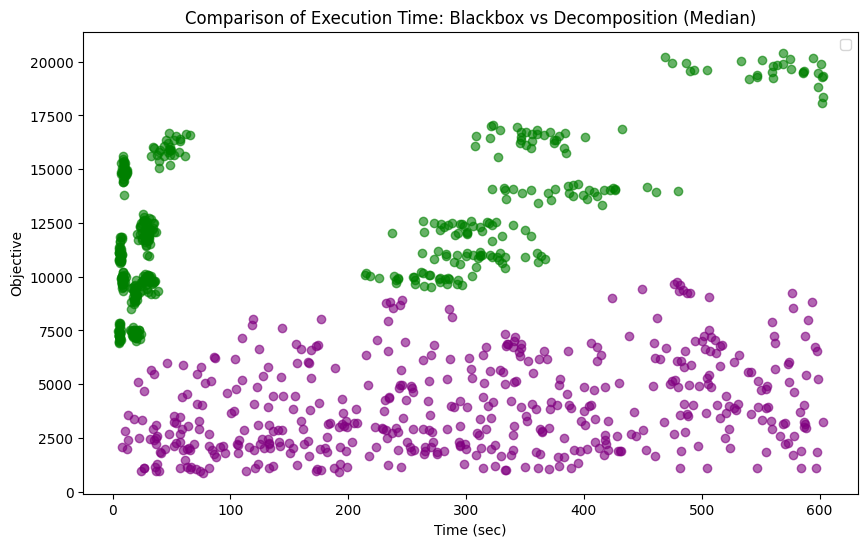

In [ ]:
median_obj = objectives[objectives['case'] == 'median'].copy()
median_obj['objective'] = median_obj['objective'].fillna(value=-1).astype(int)
median_obj['objective'] = -median_obj['objective']
median_obj = median_obj.groupby(['data_file', 'type']).max().reset_index()
blackbox_data = median_obj[median_obj['type'] == 'bb'][['data_file', 'time', 'objective']].copy()
decomp_data = median_obj[median_obj['type'] == 'decomp'][['data_file', 'time', 'objective']].copy()
median = pd.merge(left=blackbox_data, right=decomp_data, suffixes=('_bb', '_decomp'), on='data_file')
plt.figure(figsize=(10,6))
plt.scatter(median['time_bb'], median['objective_bb'], color='purple', alpha=0.6)
plt.scatter(median['time_decomp'], median['objective_decomp'], color='green', alpha=0.6)
plt.xlabel('Time (sec)')
plt.ylabel('Objective')
plt.title('Comparison of Execution Time: Blackbox vs Decomposition (Median)')
plt.legend()
plt.show()

/var/folders/3c/_zn7n8dj09vcvgfj2crht5l00000gn/T/ipykernel_1902/4233755396.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


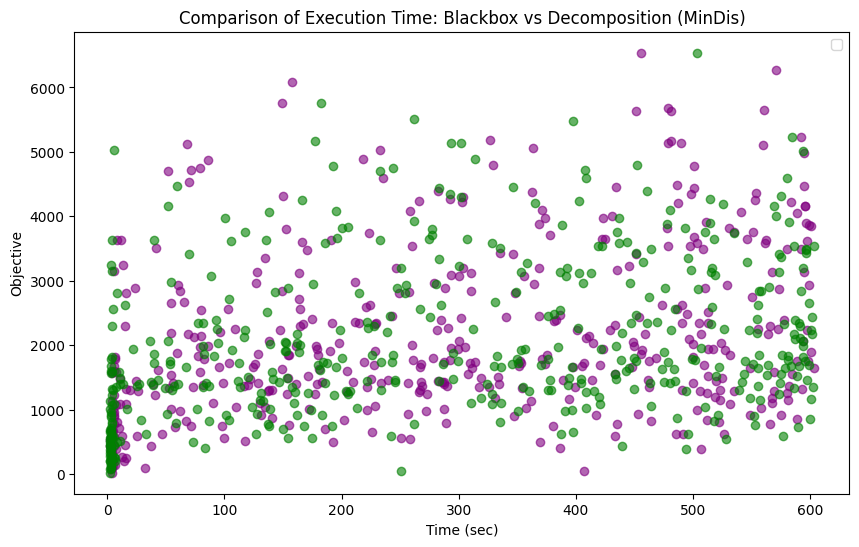

In [82]:
mindis_obj = objectives[objectives['case'] == 'mindis'].copy()
mindis_obj['objective'] = mindis_obj['objective'].fillna(value=-1).astype(int)
mindis_obj = mindis_obj.groupby(['data_file', 'type']).max().reset_index()
blackbox_data = mindis_obj[mindis_obj['type'] == 'bb'][['data_file', 'time', 'objective']].copy()
decomp_data = mindis_obj[mindis_obj['type'] == 'decomp'][['data_file', 'time', 'objective']].copy()
mindis = pd.merge(left=blackbox_data, right=decomp_data, suffixes=('_bb', '_decomp'), on='data_file')
plt.figure(figsize=(10,6))
plt.scatter(mindis['time_bb'], mindis['objective_bb'], color='purple', alpha=0.6)
plt.scatter(mindis['time_decomp'], mindis['objective_decomp'], color='green', alpha=0.6)
plt.xlabel('Time (sec)')
plt.ylabel('Objective')
plt.title('Comparison of Execution Time: Blackbox vs Decomposition (MinDis)')
plt.legend()
plt.show()

/var/folders/3c/_zn7n8dj09vcvgfj2crht5l00000gn/T/ipykernel_1902/1648004550.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


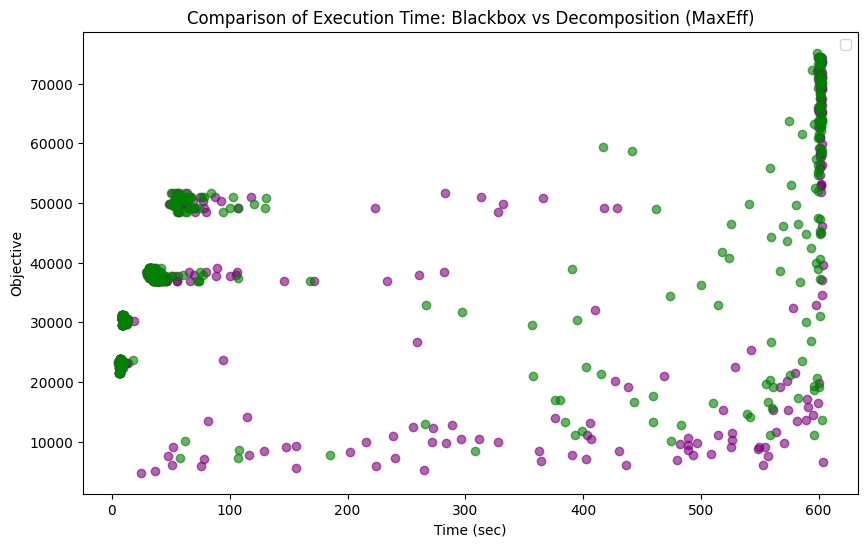

In [84]:
maxeff_obj = objectives[objectives['case'] == 'maxeff'].copy()
maxeff_obj['objective'] = -maxeff_obj['objective'].fillna(value=-1).astype(int)
maxeff_obj = maxeff_obj.groupby(['data_file', 'type']).max().reset_index()
blackbox_data = maxeff_obj[maxeff_obj['type'] == 'bb'][['data_file', 'time', 'objective']].copy()
decomp_data = maxeff_obj[maxeff_obj['type'] == 'decomp'][['data_file', 'time', 'objective']].copy()
maxeff = pd.merge(left=blackbox_data, right=decomp_data, suffixes=('_bb', '_decomp'), on='data_file')
plt.figure(figsize=(10,6))
plt.scatter(maxeff['time_bb'], maxeff['objective_bb'], color='purple', alpha=0.6)
plt.scatter(maxeff['time_decomp'], maxeff['objective_decomp'], color='green', alpha=0.6)
plt.xlabel('Time (sec)')
plt.ylabel('Objective')
plt.title('Comparison of Execution Time: Blackbox vs Decomposition (MaxEff)')
plt.legend()
plt.show()